In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def FitPredict(modelType, model, X_train, X_test, Y_train,  Y_test):
    
    print(modelType)
    start = time.time()
    model.fit(X_train, Y_train.ravel())
    end = time.time()
    print("Training Time: " + str(end - start))
    start = time.time()
    Y_Pred = model.predict(X_test)
    end = time.time()
    print("Testing Time: " + str(end - start))
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    print(float(f1_score(Y_test, Y_Pred)))
    c = confusion_matrix(Y_test, Y_Pred, labels=[0,1])
    print(c)
    print('')
    print('')
    try:
        print(model.predict(portScaler.transform([[53,55917]])))
        print(model.predict(portScaler.transform([[53,58701]])))
        print(model.predict(portScaler.transform([[53,43234]])))
        print(model.predict(portScaler.transform([[60722,13676]])))
        print(model.predict(portScaler.transform([[13676,60722]])))
        print(model.predict(portScaler.transform([[80,58038]])))
        print(model.predict(portScaler.transform([[58038,80]])))
        print(model.predict(portScaler.transform([[5432,40672]])))
        print(model.predict(portScaler.transform([[40672,5432]])))
    except Exception as e:
        print(e)
        pass
    return model, Y_Pred

ML Function
Random Forest
Multi Layer Perceptron
Support Vector Classifier
KNN


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def ML(X_train, X_test, Y_train, Y_test):
    
    RFclassifier, Y_Pred_RF = FitPredict("Random Forest",RandomForestClassifier(n_estimators=100), X_train, X_test, Y_train, Y_test)
    
    MLPclassifier, Y_Pred_MLP = FitPredict("MLP", MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True), X_train, X_test, Y_train, Y_test)
      
    SVCclassifier, Y_Pred_SVC =  FitPredict("SVC", svm.SVC(gamma = 2, C=1, probability=True), X_train, X_test, Y_train, Y_test)
       
    SVCLinclassifier, Y_Pred_SVCLin = FitPredict("SVC Linear", svm.SVC(kernel='linear', C=0.0025, probability=True), X_train, X_test, Y_train, Y_test)
    
    NBclassifier, Y_Pred_NB = FitPredict("Naive Bayes", GaussianNB(), X_train, X_test, Y_train, Y_test)
       
    KNNclassifier, Y_Pred_KNN = FitPredict("KNN", neighbors.KNeighborsClassifier(), X_train, X_test, Y_train, Y_test)
        
    stackingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    stacking, Y_Pred_Stack = FitPredict("Stacking", StackingClassifier(estimators=stackingModels), X_train, X_test, Y_train, Y_test)
     
    hVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    HVoting, Y_Pred_HVoting = FitPredict("Hard Voting - All Models", VotingClassifier(estimators=hVotingModels, voting='hard'), X_train, X_test, Y_train, Y_test)
    
    sVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    SVoting, Y_Pred_SVoting = FitPredict("Soft Voting - All Models", VotingClassifier(estimators=sVotingModels, voting='soft'), X_train, X_test, Y_train, Y_test)
    
    return {"RF":[RFclassifier,Y_Pred_RF],"MLP":[MLPclassifier,Y_Pred_MLP],"SVC":[SVCclassifier,Y_Pred_SVC],"SVCLin":[SVCLinclassifier,Y_Pred_SVCLin],"NB":[NBclassifier,Y_Pred_NB],"KNN":[KNNclassifier,Y_Pred_KNN],"Stacking":[stacking,Y_Pred_Stack],"HVoting":[HVoting,Y_Pred_HVoting],"SVoting":[SVoting,Y_Pred_SVoting]}

Here I import the data sets, the Host data every 5 seconds and Netflows for each of the devices.
The labels and data have been split in preperation for being fed into the classifiers
in the NetwFlow data the start and end timestamps of each flow have been removed as I believe the ML would just use the timestamp to identify the anomolous and non-anomoulous flows. 

In [102]:
import os
import pandas as pd
import shutil
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib


def DataProcess(path):
    HostDataFiles = os.listdir(path + "/HostData-5s")
    NetFlowFiles = os.listdir(path + "/NetFlow")
    Host = pd.DataFrame([])
    NetFlow = pd.DataFrame([])
    folder = path.split("/")[5]
    #for j in HostDataFiles:
    #    df = pd.read_csv(path+ "/HostData-5s/" + j)  
    #    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    #    del df['time'] 
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    Host = Host.append(df)
    #for j in NetFlowFiles:
    #    df = pd.read_csv(path + "/NetFlow/" + j, index_col=0 )    
    #    del df['ts']
    #    del df['te']
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    NetFlow = NetFlow.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_L.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_I2.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)

    df = pd.read_csv(path + "/NetFlow/"+folder+"_L.csv", index_col=0 )    
    del df['ts']
    del df['te']
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    for i in range(1):
        NetFlow = NetFlow.append(df)
    
    df = pd.read_csv(path + "/NetFlow/"+folder+"_I2.csv", index_col=0 )    
    del df['ts']
    del df['te']
    df = df.reset_index()  
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    labels = []
    for index, row in df.iterrows():
        if row["Label"] == 0:
            labels.append(index)
    df = df.drop(labels)
    for i in range(4):
        NetFlow = NetFlow.append(df)
   
    
    HostLabel = np.array(Host.iloc[:, :1])
    NetFlowLabel = np.array(NetFlow.iloc[:, :1])
    HostData = np.array(Host.iloc[:, 1:])
    scaler = StandardScaler()
    HostData = scaler.fit_transform(HostData)
    joblib.dump(scaler, 'HostScaler.pkl', compress=9)
    #da = np.array(HostData)
    
    NetFlowData = np.array(NetFlow.iloc[:, 1:]) 

    return HostLabel, NetFlowLabel, HostData, NetFlowData


Data Prcoessing

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy

MCHostTargets, MCNetFlowTargets, MCHostInputs, MCNetFlowInputs = DataProcess("C:/Users/james/Downloads/MC/MC")

SCHostTargets, SCNetFlowTargets, SCHostInputs, SCNetFlowInputs = DataProcess("C:/Users/james/Downloads/SC/SC")

STHostTargets, STNetFlowTargets, STHostInputs, STNetFlowInputs = DataProcess("C:/Users/james/Downloads/ST/ST")

HostTargets = np.concatenate((MCHostTargets, SCHostTargets, STHostTargets), axis = 0)
NetFlowTargets = np.concatenate((MCNetFlowTargets, SCNetFlowTargets, STNetFlowTargets), axis = 0)
HostInputs = np.concatenate((MCHostInputs, SCHostInputs, STHostInputs), axis = 0)
NetFlowInputs = np.concatenate((MCNetFlowInputs , SCNetFlowInputs , STNetFlowInputs ), axis = 0)
count1 = 0
count2 = 0
for i in HostTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


count1 = 0
count2 = 0
for i in NetFlowTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


arr = []
ordinalEncoding = {}
count = 0
for i in NetFlowInputs:
    if i[5] not in ordinalEncoding and "." in i[1] and "." in i[2]:
        ordinalEncoding[i[5]] = count
        count += 1
    if "." in i[1] and "." in i[2]:
        arr.append([i[3],i[4]])
    #arr.append([i[3],i[4],ordinalEncoding[i[5]]])
NetFlowInputsPorts = np.array(arr)

#for i in NetFlowInputs:
    #print(i[5])
labels = []
count = 0
arr = []
for i in NetFlowInputs:
    if "." in i[1] and "." in i[2]:
        IP1 = i[1].split(".")
        IP2 = i[2].split(".")
        arr.append([i[3],i[4], int(IP1[0]), int(IP1[1]), int(IP1[2]), int(IP1[3]), int(IP2[0]), int(IP2[1]), int(IP2[2]), int(IP2[3])])        
    else:
        labels.append(count)
    count = count + 1
NetFlowInputsPortsIPs = np.array(arr)
NetFlowTargets = numpy.delete(NetFlowTargets, labels)

print(HostInputs)
X_Host_train, X_Host_test, Y_Host_train, Y_Host_test = train_test_split(HostInputs, HostTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_Host_test:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))
portScaler = StandardScaler()
NetFlowInputsPorts = portScaler.fit_transform(NetFlowInputsPorts)
joblib.dump(portScaler, 'PortScaler.pkl', compress=9)
print(NetFlowInputsPorts)
X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports = train_test_split(NetFlowInputsPorts, NetFlowTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))

NetflowTargetsIPS = NetFlowTargets
X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS = train_test_split(NetFlowInputsPortsIPs, NetflowTargetsIPS, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports_IPS:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


Benign Entries: 2052
Malicious Entries: 2052

Benign Entries: 2450
Malicious Entries: 3024
[[-0.7236034   1.51405393 -1.41619841  0.42277728 -1.87301326]
 [-0.72325663  1.51405393 -1.41619841  0.42277728 -1.87301326]
 [-0.72195623  1.46679769 -1.41619841  0.42277728 -1.8512409 ]
 ...
 [ 0.06643939 -0.27761821  1.48085896  1.51644351 -0.57079397]
 [ 0.11865882 -1.06351427  1.48085896 -0.82886665 -0.57079397]
 [-0.04469426 -1.06351427  1.48085896 -0.82886665 -0.57079397]]

Benign Entries: 617
Malicious Entries: 615
[[-1.27688672  1.37731861]
 [ 1.31060455 -1.19648928]
 [ 1.14782882 -1.47480993]
 ...
 [-1.55938106  0.73163349]
 [ 0.66148671 -1.47748971]
 [-1.56046812 -1.47857102]]

Benign Entries: 571
Malicious Entries: 917

Benign Entries: 571
Malicious Entries: 917


classifier Tests

In [104]:
import joblib
print("****************************************************************************")
print("Host")
print("")
HostList = ML(X_Host_train, X_Host_test, Y_Host_train, Y_Host_test)
for i in HostList.keys():
    joblib.dump(HostList[i][0], '{}Host.pkl'.format(i), compress=9)
print("****************************************************************************")
print("NetFlow - Ports")
print("")
PortList = ML(X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports)
for i in PortList.keys():
    joblib.dump(PortList[i][0], '{}Port.pkl'.format(i), compress=9)


#print("****************************************************************************")
#print("NetFlow - Ports & IPs")
#print("")
#RFclassifierNetFlowPortIP, Y_Pred_RFNetFlowPortIP, MLPclassifierNetFlowPortIP, Y_Pred_MLPNetFlowPortIP, KNNclassifierNetFlowPortIP, Y_Pred_KNNNetFlowPortIP = ML(X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS)
#joblib.dump(RFclassifierNetFlowPort, 'NetDataModel.pkl', compress=9)
#joblib.dump(RFclassifierHost, 'HostDataModel.pkl', compress=9)

****************************************************************************
Host

Random Forest
Training Time: 0.11409831047058105
Testing Time: 0.011008739471435547
1232
1231
0.9991883116883117
0.9991876523151909
[[616   1]
 [  0 615]]


X has 2 features, but RandomForestClassifier is expecting 5 features as input.
MLP
Training Time: 0.8111958503723145
Testing Time: 0.0020020008087158203
1232
1232
1.0
1.0
[[617   0]
 [  0 615]]


X has 2 features, but MLPClassifier is expecting 5 features as input.
SVC
Training Time: 0.30275988578796387
Testing Time: 0.044538021087646484
1232
1231
0.9991883116883117
0.9991876523151909
[[616   1]
 [  0 615]]


X has 2 features, but SVC is expecting 5 features as input.
SVC Linear
Training Time: 0.1961681842803955
Testing Time: 0.012511014938354492
1232
1216
0.987012987012987
0.9871175523349436
[[603  14]
 [  2 613]]


X has 2 features, but SVC is expecting 5 features as input.
Naive Bayes
Training Time: 0.0010008811950683594
Testing Time: 0.0
1232
120

Results If a packet was marked as suspicous by every model to be ultimatley amrked as suspicious

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

Y_Pred_Host = []
print(len(HostList["RF"][1]))
for i in range(len(HostList["RF"][1])):
    if (HostList["RF"][1][i] == 1 and HostList["MLP"][1][i] == 1 and HostList["SVC"][1][i] == 1 and HostList["SVCLin"][1][i] == 1 and HostList["NB"][1][i] == 1 and HostList["KNN"][1][i] == 1):
        Y_Pred_Host.append([1])
    else:
        Y_Pred_Host.append([0])

M, N = X_Host_test.shape
print(M)
count = 0
for N in range(M):
    if Y_Pred_Host[N] == Y_Host_test[N]:
        count = count + 1
print(count)
print("")
print("")
Y_Pred_Port = []
print(len(PortList["RF"][1]))
for i in range(len(PortList["RF"][1])):
    if (PortList["RF"][1][i] == 1 and PortList["MLP"][1][i] == 1 and PortList["SVC"][1][i] == 1 and PortList["SVCLin"][1][i] == 1 and PortList["NB"][1][i] == 1 and PortList["KNN"][1][i] == 1):
        Y_Pred_Port.append([1])
    else:
        Y_Pred_Port.append([0])

M, N = X_test_Ports.shape
print(M)
count = 0
for N in range(M):
    if Y_Pred_Port[N] == Y_test_Ports[N]:
        count = count + 1
print(count)
        



1232
1232
1230


1488
1488
1252


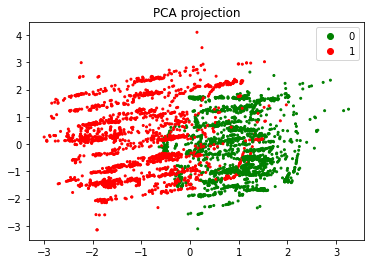

In [106]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



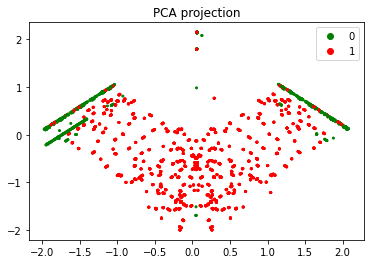

In [107]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(NetFlowInputsPorts)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=NetFlowTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



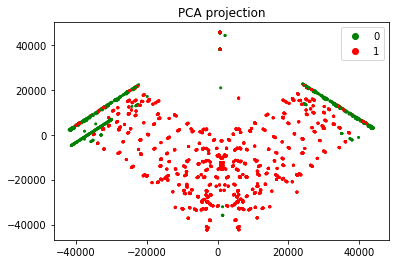

In [108]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(NetFlowInputsPortsIPs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=NetflowTargetsIPS, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



In [115]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
def crossValidate(model, Y_Pred, modelName, dataSet):
    if dataSet == "Ports":
        Y_test = Y_test_Ports
        X_test = X_test_Ports
    elif dataSet == "Host":
        Y_test = Y_Host_test
        X_test = X_Host_test
    CV_results = cross_validate(model, HostInputs, HostTargets.ravel(), cv=5,return_train_score=True)
    training = CV_results["train_score"]
    testing = CV_results["test_score"]
    plt.boxplot([training, testing])
    plt.xticks([1, 2], ['training', 'testing'])
    plt.title('crossvalidation scores for {} - {}'.format(modelName, dataSet))
    plt.show()
    labels = [0,1]
    c = sklearn.metrics.confusion_matrix(Y_test, Y_Pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=c,
                           display_labels=[0,1])
    disp.plot()
    plt.title('Confusion matrix of {} - {}'.format(modelName, dataSet))
    plt.show()
    if dataSet == "Ports":      
        print(model.predict(portScaler.transform([[2323,60893]])))
        print(model.predict(portScaler.transform([[60893,2323]])))
        print(model.predict(portScaler.transform([[23,60893]])))
        print(model.predict(portScaler.transform([[60893,23]])))  
        print(model.predict(portScaler.transform([[40676,5432]])))
        print(model.predict(portScaler.transform([[5432,40676]])))
        print(model.predict(portScaler.transform([[53,48353]])))
        print(model.predict(portScaler.transform([[48353, 53]])))
    print(sklearn.metrics.f1_score(Y_test, Y_Pred))


Cross Validating all the models, creating Confucion matrixs for each and testing the port based models on common port combinations from the local network.

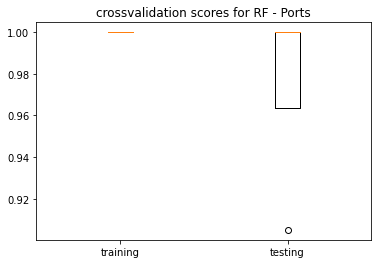

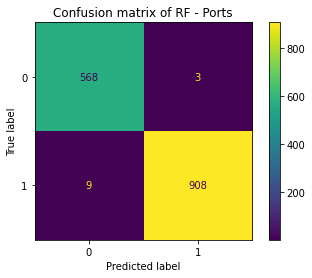

[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
0.9934354485776805


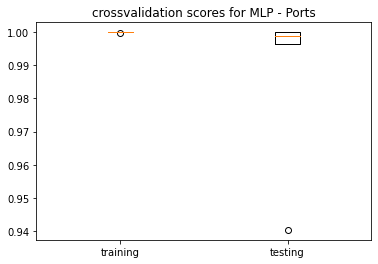

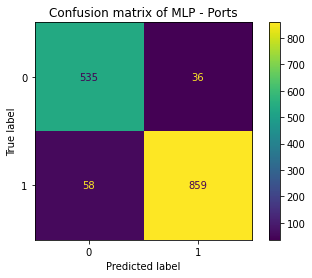

[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
0.9481236203090507


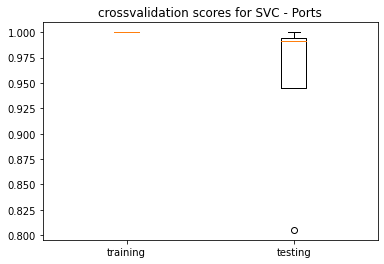

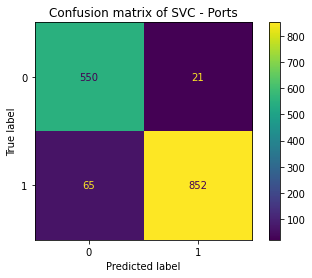

[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
0.9519553072625698


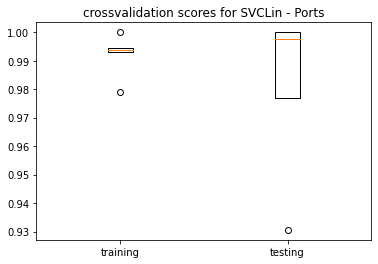

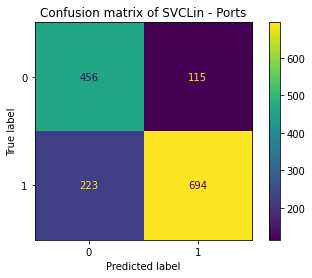

[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
0.8041714947856315


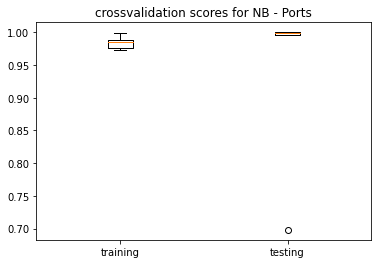

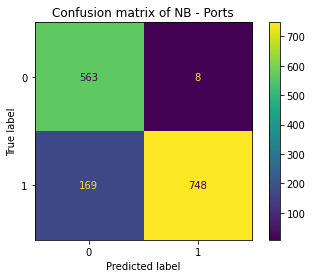

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
0.8942020322773461


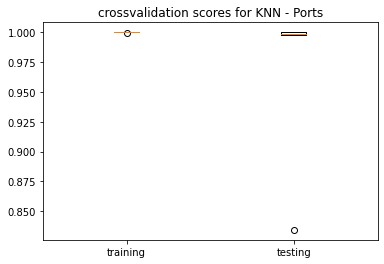

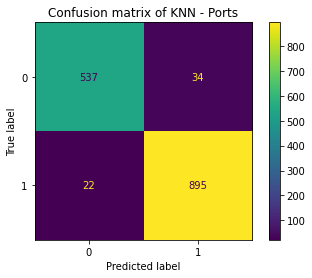

[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
0.9696641386782232


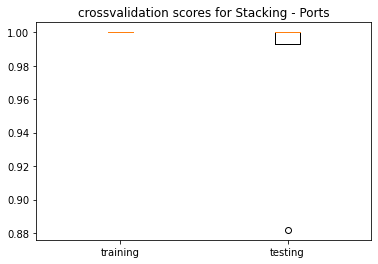

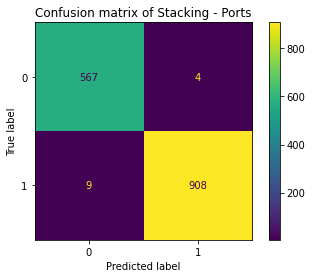

[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
0.9928922908693275


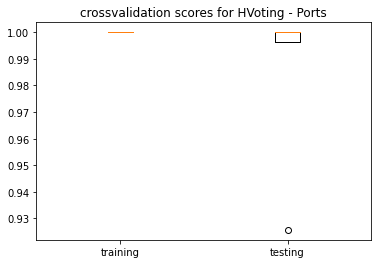

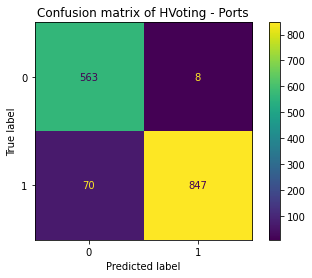

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
0.9559819413092552


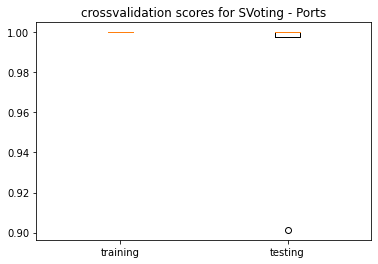

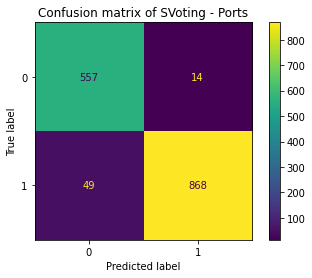

[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
0.9649805447470817


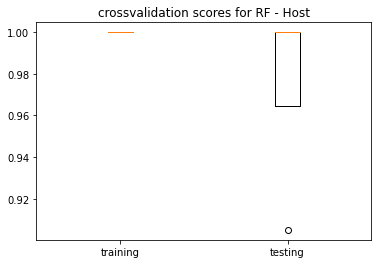

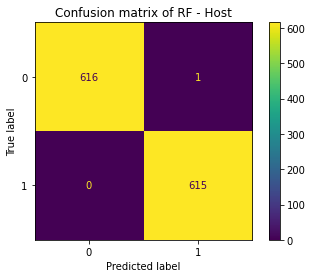

0.9991876523151909


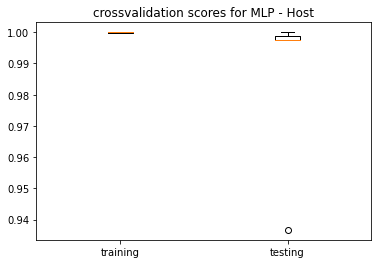

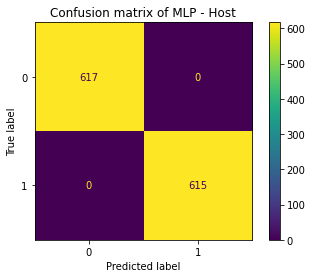

1.0


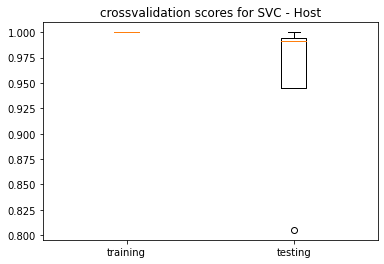

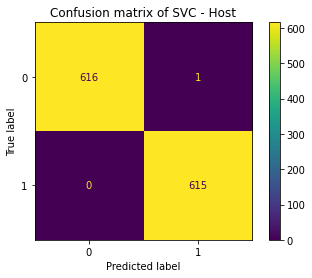

0.9991876523151909


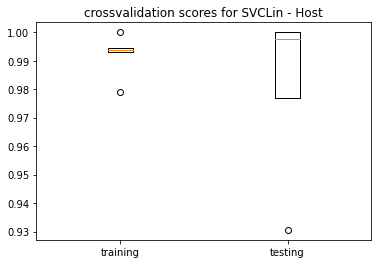

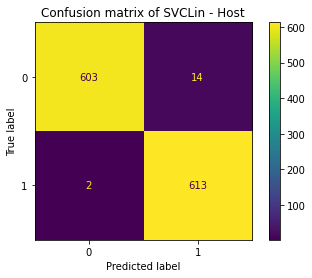

0.9871175523349436


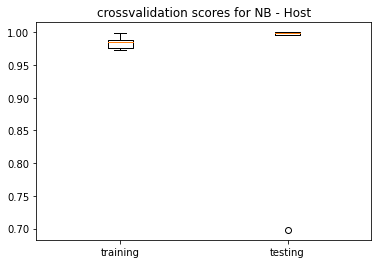

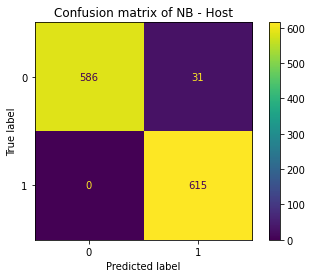

0.9754163362410786


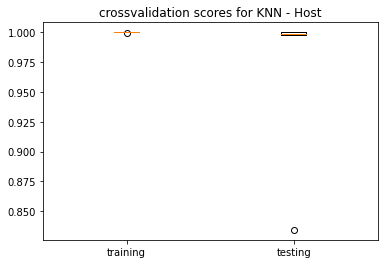

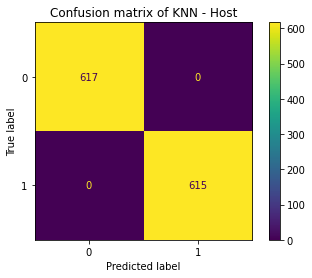

1.0


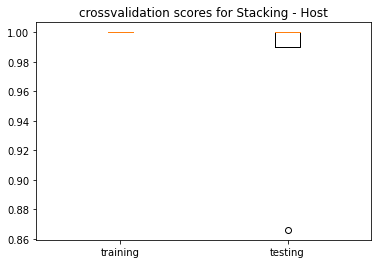

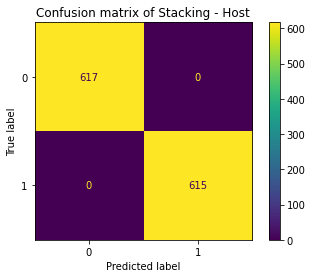

1.0


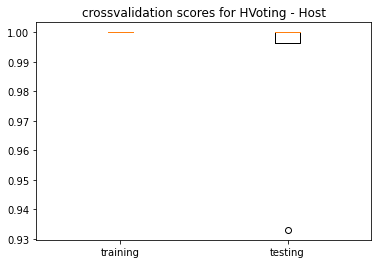

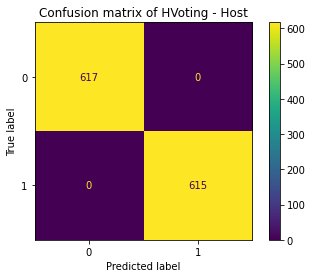

1.0


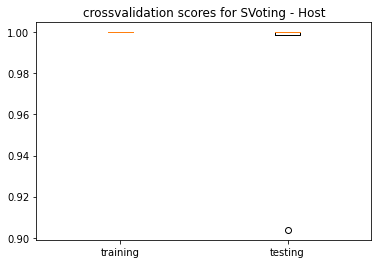

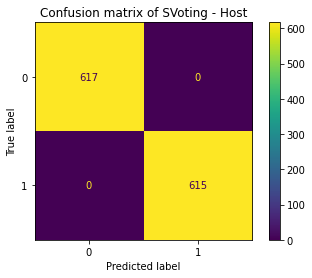

1.0


In [116]:
for model in PortList.keys():
    crossValidate(PortList[model][0], PortList[model][1], model, "Ports")
for model in HostList.keys():
    crossValidate(HostList[model][0], HostList[model][1], model, "Host")